In [18]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


In [ ]:

# Carregar dataset processado
df = pd.read_csv("../data/processed/superstore_clean.csv", encoding="utf-8")
df.head()

In [ ]:
# Converter as dtas

df["order_date"] = pd.to_datetime(df["order_date"])
df["ship_date"] = pd.to_datetime(df["ship_date"])

In [ ]:
# Visao geral

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   row_id         9994 non-null   int64         
 1   order_id       9994 non-null   object        
 2   order_date     9994 non-null   datetime64[ns]
 3   ship_date      9994 non-null   datetime64[ns]
 4   ship_mode      9994 non-null   object        
 5   customer_id    9994 non-null   object        
 6   customer_name  9994 non-null   object        
 7   segment        9994 non-null   object        
 8   country        9994 non-null   object        
 9   city           9994 non-null   object        
 10  state          9994 non-null   object        
 11  postal_code    9994 non-null   int64         
 12  region         9994 non-null   object        
 13  product_id     9994 non-null   object        
 14  category       9994 non-null   object        
 15  sub_category   9994 n

In [ ]:
# Estatísticas básicas

df.describe()

,row_id,order_date,ship_date,postal_code,sales,quantity,discount,profit,year,profit_margin
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896,2015.722233,0.120314
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,2014.000000,-2.750000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750,2015.000000,0.075000
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500,2016.000000,0.270000
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000,2017.000000,0.362500
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000,2017.000000,0.500000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108,1.123555,0.466754


In [10]:
df.isna().sum()

row_id           0
order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
sub_category     0
product_name     0
sales            0
quantity         0
discount         0
profit           0
year             0
month            0
profit_margin    0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# Qual é o faturamento total?

df["sales"].sum()

np.float64(2297200.8603)

In [ ]:
# Qual é o lucro total?

df["profit"].sum()

np.float64(286397.0217)

In [ ]:
# Quantos pedidos únicos?

df["order_id"].nunique()

5009

In [ ]:
# Ticket médio por pedido

df.groupby("order_id")["sales"].sum().mean()

np.float64(458.61466566180883)

In [16]:
# Vendas ao longo do tempo

sales_time = (
    df
    .groupby(pd.Grouper(key="order_date", freq="M"))["sales"]
    .sum()

)

sales_time.head()

C:\Users\Gustavo\AppData\Local\Temp\ipykernel_18044\3200887723.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby(pd.Grouper(key="order_date", freq="M"))["sales"]


order_date
2014-01-31    14236.895
2014-02-28     4519.892
2014-03-31    55691.009
2014-04-30    28295.345
2014-05-31    23648.287
Freq: ME, Name: sales, dtype: float64

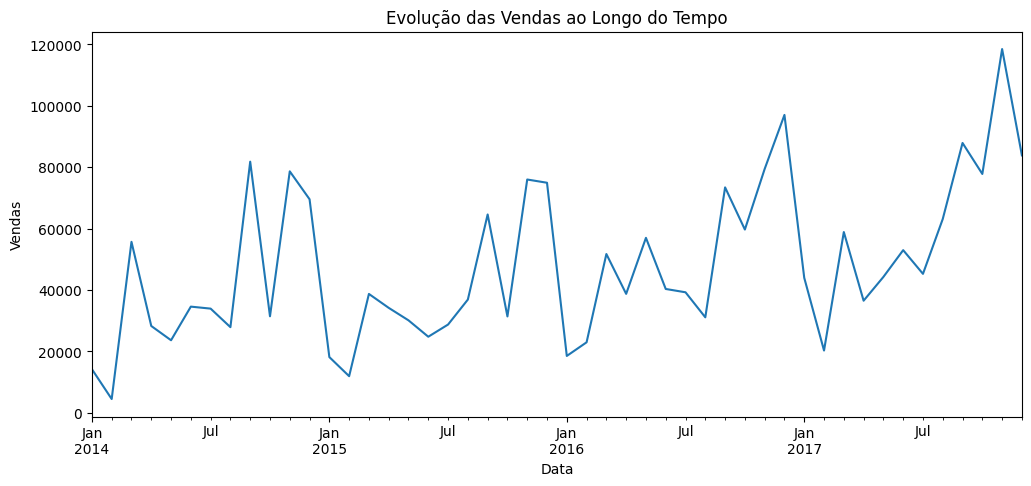

In [17]:
# Gráfico de evolução das vendas

plt.figure(figsize=(12,5))
sales_time.plot()
plt.title("Evolução das Vendas ao Longo do Tempo")
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.show()


In [19]:
# Vendas por categoria

category_sales = (
    df

    .groupby("category")["sales"]
    .sum()
    .sort_values(ascending=False)
)

category_sales

category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: sales, dtype: float64

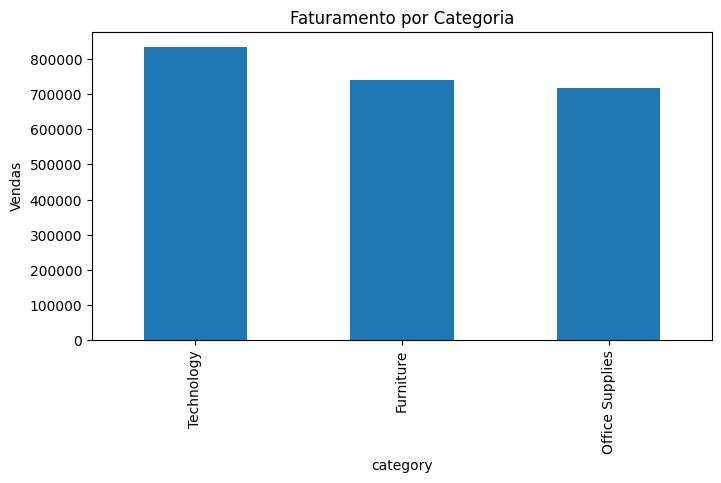

In [23]:
category_sales.plot(kind="bar", figsize=(8,4))
plt.title("Faturamento por Categoria")
plt.ylabel("Vendas")
plt.show()

In [ ]:
# Lucro por Categoria
category_profit = (
    df 

    .groupby("category")["profit"]
    .sum()
    .sort_values(ascending=False)

)

category_profit

category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18451.2728
Name: profit, dtype: float64

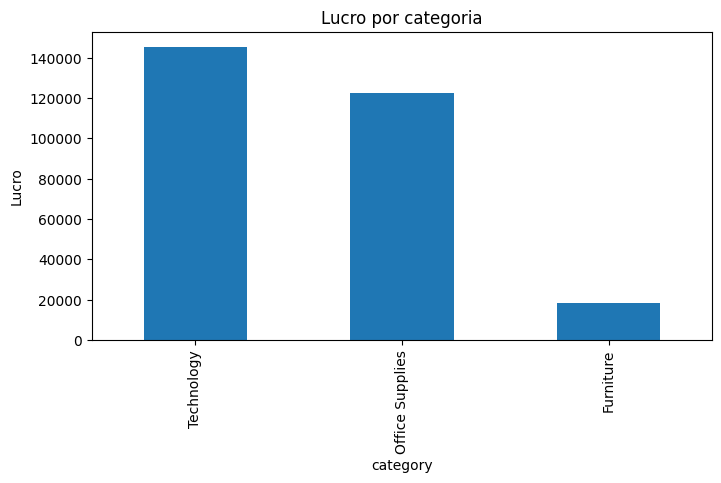

In [ ]:
# Gráfico do lucro
category_profit.plot(kind="bar", figsize=(8,4))
plt.title("Lucro por categoria")
plt.ylabel("Lucro")
plt.show()

In [26]:
# Região: volume x rentabilidade

region_summary = (

    df
    .groupby("region")[["sales", "profit"]]
    .sum()
)

region_summary

,sales,profit
region,,
Central,501239.8908,39706.3625
East,678781.2400,91522.7800
South,391721.9050,46749.4303
West,725457.8245,108418.4489


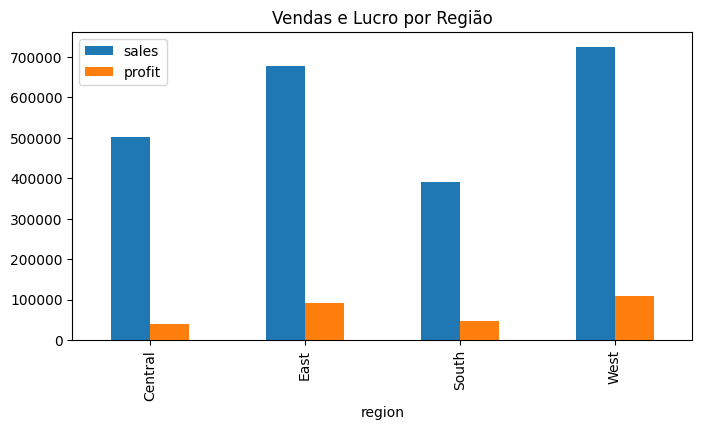

In [27]:
# Grafico de região

region_summary.plot(kind="bar", figsize=(8,4))
plt.title("Vendas e Lucro por Região")
plt.show()

In [29]:
# Segmento de clientes

segment_summary = (
    df
    .groupby("segment")[["sales","profit"]]
    .sum()
)

segment_summary

,sales,profit
segment,,
Consumer,1.161401e+06,134119.2092
Corporate,7.061464e+05,91979.1340
Home Office,4.296531e+05,60298.6785


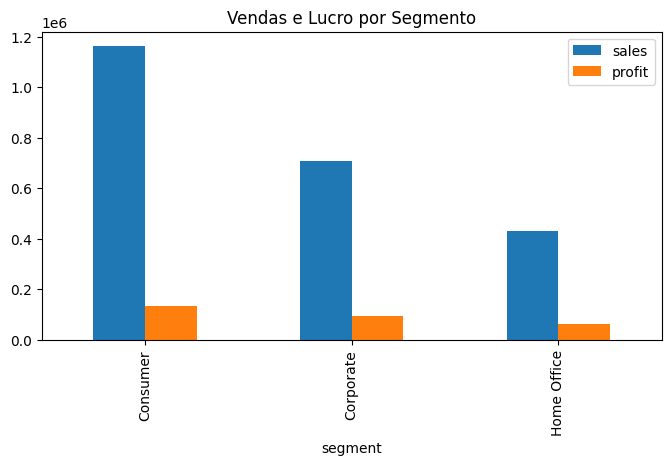

In [30]:
segment_summary.plot(kind="bar", figsize=(8,4))
plt.title("Vendas e Lucro por Segmento")
plt.show()


In [31]:
# Margem de lucro
margin_category = (
    df
    .groupby("category")["profit_margin"]
    .mean()
    .sort_values(ascending=False)
)

margin_category


category
Technology         0.156138
Office Supplies    0.138030
Furniture          0.038784
Name: profit_margin, dtype: float64

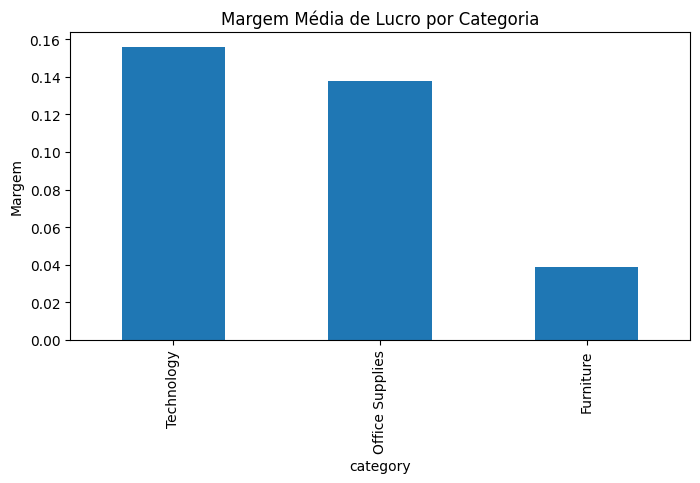

In [32]:
margin_category.plot(kind="bar", figsize=(8,4))
plt.title("Margem Média de Lucro por Categoria")
plt.ylabel("Margem")
plt.show()



In [35]:
# Visao geral: Desconto x lucro

df[["discount", "profit"]].describe()


,discount,profit
count,9994.000000,9994.000000
mean,0.156203,28.656896
std,0.206452,234.260108
min,0.000000,-6599.978000
25%,0.000000,1.728750
50%,0.200000,8.666500
75%,0.200000,29.364000
max,0.800000,8399.976000


In [37]:
# Análise de distribuição percentual

# 1. Filtrar apenas vendas com desconto
df_discount = df[df["discount"] > 0]

# 2. Contar quantas vendas existem para cada nível de desconto
discount_counts = (
    df_discount
    .groupby("discount")
    .size()
)

# 3. Transformar a contagem em porcentagem
discount_percentage = (
    discount_counts / discount_counts.sum()
) * 100

# 4. Ordenar do menor desconto para o maior
discount_percentage = discount_percentage.sort_index()

discount_percentage



discount
0.10     1.809084
0.15     1.000770
0.20    70.381062
0.30     4.368745
0.32     0.519630
0.40     3.964588
0.45     0.211701
0.50     1.270208
0.60     2.655889
0.70     8.044650
0.80     5.773672
dtype: float64

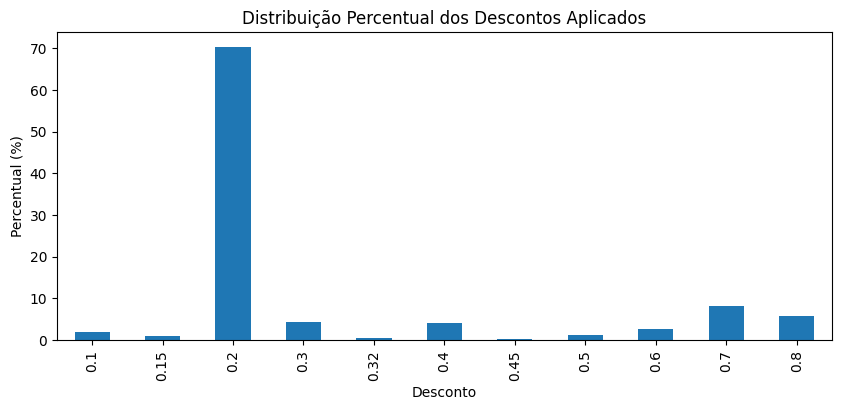

In [38]:
plt.figure(figsize=(10,4))
discount_percentage.plot(kind="bar")
plt.title("Distribuição Percentual dos Descontos Aplicados")
plt.xlabel("Desconto")
plt.ylabel("Percentual (%)")
plt.show()


In [39]:
# Desconto x Lucro Médio

# Usar apenas vendas com desconto
df_discount = df[df["discount"] > 0]

# Lucro médio por nível de desconto
discount_profit_mean = (
    df_discount
    .groupby("discount")["profit"]
    .mean()
    .sort_index()
)

discount_profit_mean


discount
0.10     96.055074
0.15     27.288298
0.20     24.702572
0.30    -45.679636
0.32    -88.560656
0.40   -111.927429
0.45   -226.646464
0.50   -310.703456
0.60    -43.077212
0.70    -95.874060
0.80   -101.796797
Name: profit, dtype: float64

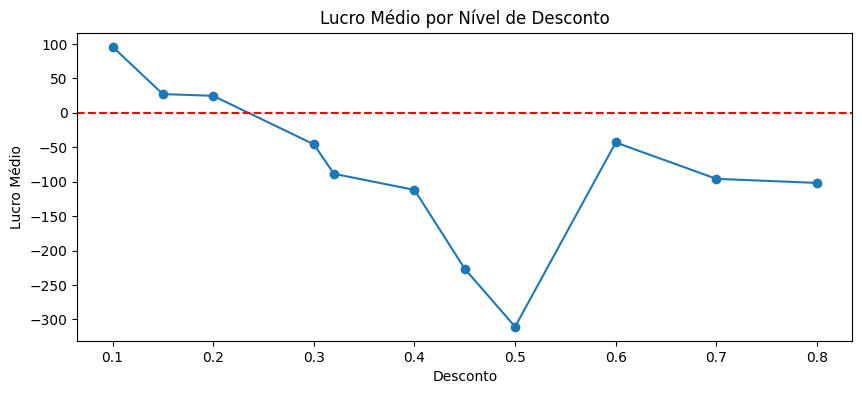

In [40]:
plt.figure(figsize=(10,4))
discount_profit_mean.plot(marker="o")
plt.axhline(0, color="red", linestyle="--")
plt.title("Lucro Médio por Nível de Desconto")
plt.xlabel("Desconto")
plt.ylabel("Lucro Médio")
plt.show()


In [41]:
# Margem segura de desconto

# Margem média por nível de desconto
discount_margin_mean = (
    df_discount
    .groupby("discount")["profit_margin"]
    .mean()
    .sort_index()
)

discount_margin_mean


discount
0.10    0.155792
0.15    0.034163
0.20    0.176839
0.30   -0.115481
0.32   -0.174292
0.40   -0.222492
0.45   -0.454545
0.50   -0.549091
0.60   -0.689130
0.70   -0.794737
0.80   -1.825000
Name: profit_margin, dtype: float64

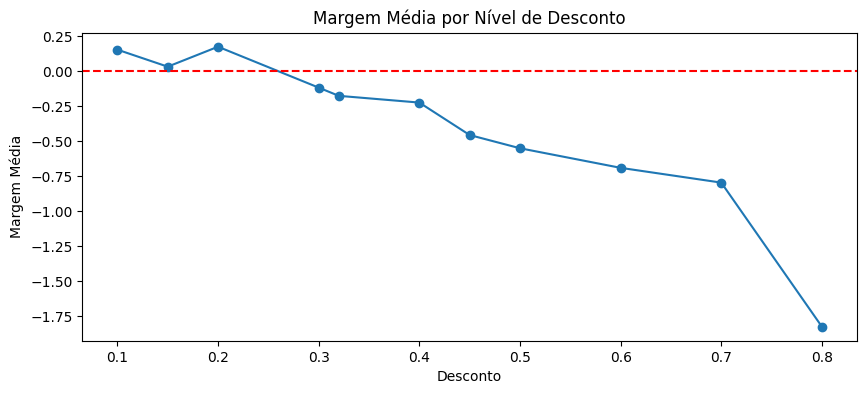

In [42]:
plt.figure(figsize=(10,4))
discount_margin_mean.plot(marker="o")
plt.axhline(0, color="red", linestyle="--")
plt.title("Margem Média por Nível de Desconto")
plt.xlabel("Desconto")
plt.ylabel("Margem Média")
plt.show()


In [ ]:
# Onde o desconto causa mais prejuízo?

# Vendas com desconto e prejuízo
loss_discount = df_discount[df_discount["profit"] < 0]

# Total de vendas com prejuízo por categoria
loss_by_category = (
    loss_discount
    .groupby("category")["sales"]
    .sum()
    .sort_values(ascending=False)
)

loss_by_category


category
Furniture          257885.5868
Technology         119212.8930
Office Supplies     91608.6750
Name: sales, dtype: float64

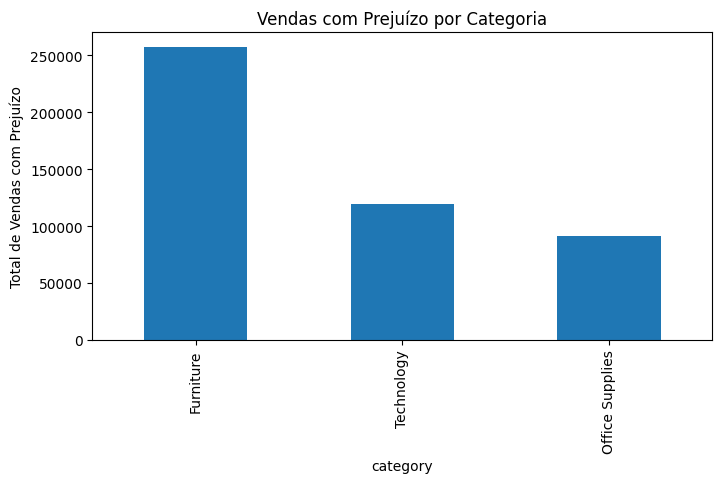

In [44]:
plt.figure(figsize=(8,4))
loss_by_category.plot(kind="bar")
plt.title("Vendas com Prejuízo por Categoria")
plt.ylabel("Total de Vendas com Prejuízo")
plt.show()
